In [297]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [298]:
dataset = pd.read_csv('Data_Scientist_Salary.csv')
dataset.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S


In [299]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [300]:
dataset.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [301]:
dataset.shape

(3755, 11)

In [302]:
dataset.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [303]:
dataset.duplicated().sum()

1171

In [304]:
dataset = dataset.drop_duplicates()
dataset.duplicated().sum()

0

In [305]:
dataset.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S


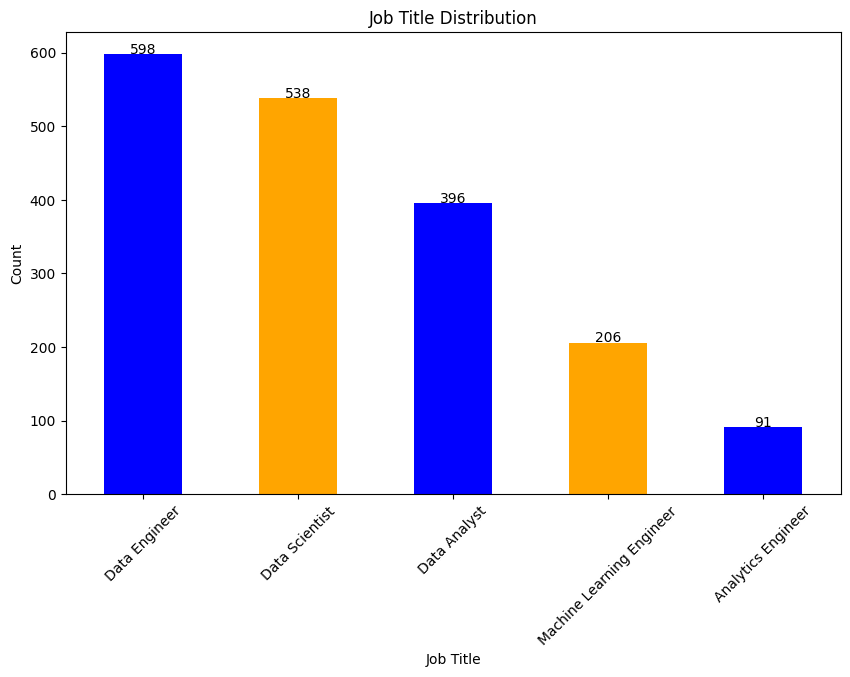

In [306]:
counts = dataset['job_title'].value_counts().sort_values(ascending=False).head()

ax = counts.plot(kind='bar', color=['blue', 'orange'], figsize=(10, 6))
for i, v in enumerate(counts):
    ax.text(i, v + 0.5, str(v), ha='center', fontsize=10)

plt.title('Job Title Distribution')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [307]:
dataset['employment_type'].value_counts()

employment_type
FT    2547
PT      17
CT      10
FL      10
Name: count, dtype: int64

In [308]:
dataset['salary_currency'].value_counts()

salary_currency
USD    2107
EUR     200
GBP     144
INR      59
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY       3
THB       2
ILS       1
HKD       1
CZK       1
MXN       1
CLP       1
Name: count, dtype: int64

In [309]:
dataset.groupby('experience_level')['salary_in_usd'].mean()

experience_level
EN     72648.685185
EX    191078.208333
MI    101828.783133
SE    153897.435650
Name: salary_in_usd, dtype: float64

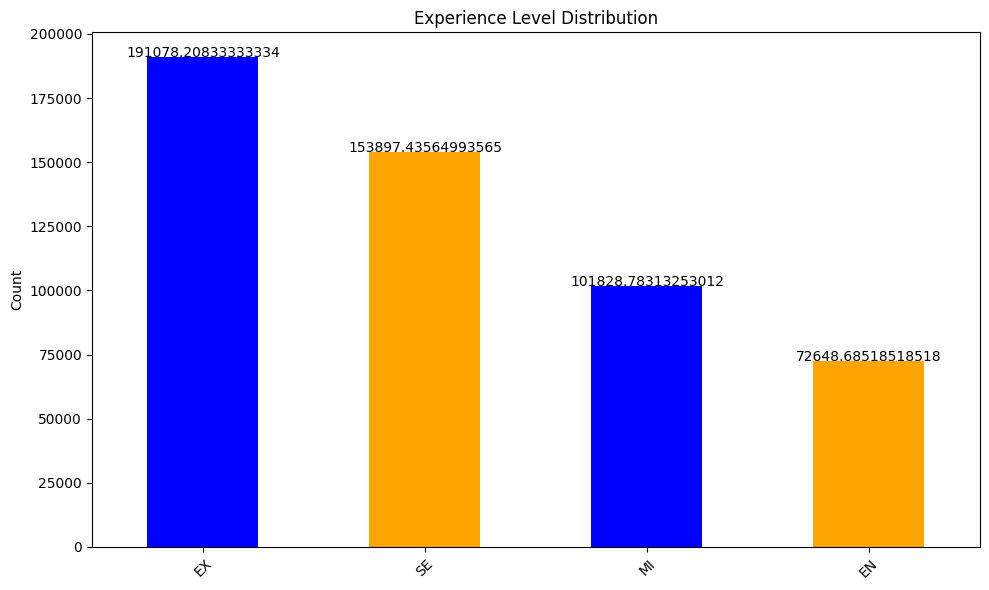

In [310]:
counts = dataset.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False)
ax = counts.plot(kind='bar', color=['blue', 'orange'], figsize=(10, 6))
for i, v in enumerate(counts):
    ax.text(i, v + 0.5, str(v), ha='center', fontsize=10)

plt.title('Experience Level Distribution')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [311]:
dataset.groupby('company_size')['salary_in_usd'].mean()

company_size
L    113202.239609
M    141474.514300
S     78364.278912
Name: salary_in_usd, dtype: float64

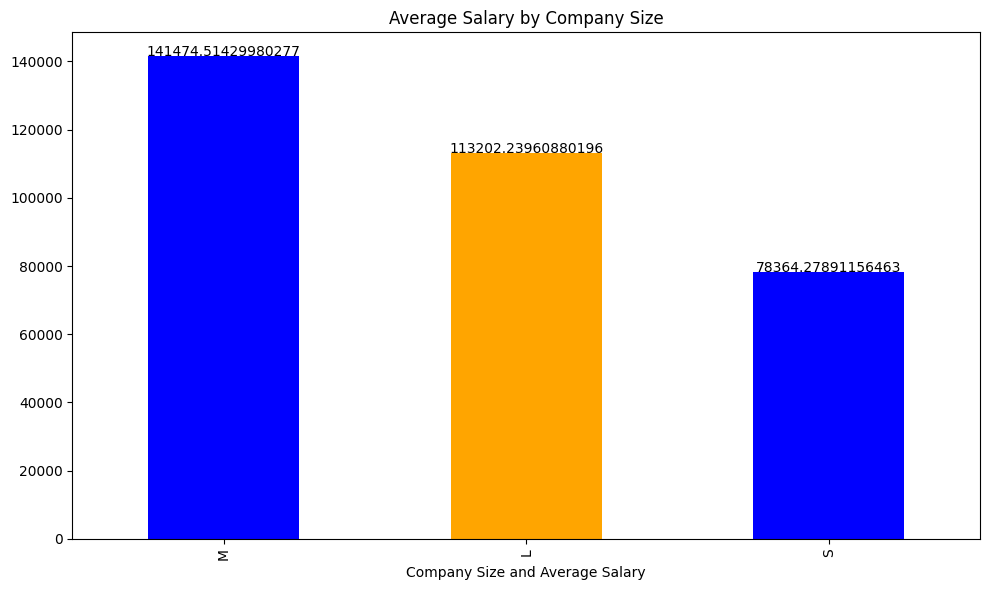

In [312]:
counts = dataset.groupby('company_size')['salary_in_usd'].mean().sort_values(ascending=False)
ax = counts.plot(kind='bar', color=['blue', 'orange'], figsize=(10, 6))
for i, v in enumerate(counts):
    ax.text(i, v + 0.5, str(v), ha='center', fontsize=10)
plt.title('Average Salary by Company Size')
plt.xlabel('Company Size and Average Salary')
plt.ylabel('')
plt.tight_layout()
plt.show()

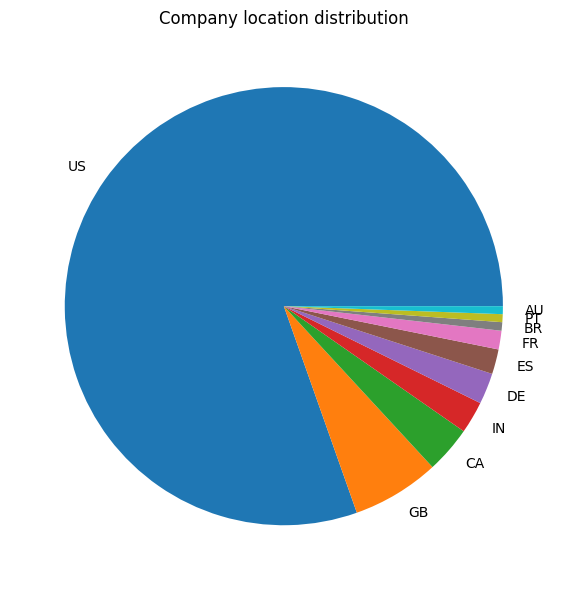

In [313]:
dataset['company_location'].value_counts().sort_values(ascending=False).head(10).plot(kind = 'pie', figsize=(8,6), color=['blue', 'orange'], 
                                                title='Company location distribution', xlabel='Company Location', 
                                                ylabel='')
plt.tight_layout()
plt.show()

In [314]:
dataset.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S


In [315]:
dataset = dataset[['experience_level', 'employment_type', 'job_title', 'company_size','salary_in_usd']]

In [316]:
x = dataset.drop(['salary_in_usd'], axis = 1)
y = dataset['salary_in_usd']

In [317]:
x = pd.get_dummies(x, drop_first=True)
x

,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Developer,job_title_AI Programmer,job_title_AI Scientist,job_title_Analytics Engineer,...,job_title_Principal Machine Learning Engineer,job_title_Product Data Analyst,job_title_Product Data Scientist,job_title_Research Engineer,job_title_Research Scientist,job_title_Software Data Engineer,job_title_Staff Data Analyst,job_title_Staff Data Scientist,company_size_M,company_size_S
0,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3751,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3752,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3753,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [319]:
corr = x.corr()
corr

,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Developer,job_title_AI Programmer,job_title_AI Scientist,job_title_Analytics Engineer,...,job_title_Principal Machine Learning Engineer,job_title_Product Data Analyst,job_title_Product Data Scientist,job_title_Research Engineer,job_title_Research Scientist,job_title_Software Data Engineer,job_title_Staff Data Analyst,job_title_Staff Data Scientist,company_size_M,company_size_S
experience_level_EX,1.000000,-0.115516,-0.241278,-0.012244,0.006452,-0.015985,-0.012844,-0.005467,0.010579,0.051276,...,-0.003865,-0.008649,-0.003865,-0.022341,-0.018487,-0.005467,0.100168,-0.003865,0.008247,0.004759
experience_level_MI,-0.115516,1.000000,-0.722338,0.034667,-0.026034,-0.014991,-0.011245,-0.016367,0.010032,-0.049893,...,-0.011571,0.054720,-0.011571,-0.027448,0.035615,0.015480,-0.011571,-0.011571,-0.082171,0.042924
experience_level_SE,-0.241278,-0.722338,1.000000,-0.038369,0.114779,-0.099958,-0.043891,-0.034186,-0.066727,0.061205,...,0.016019,-0.054084,0.016019,0.015163,-0.025695,-0.005764,-0.024168,0.016019,0.237303,-0.154940
employment_type_FL,-0.012244,0.034667,-0.038369,1.000000,-0.517141,-0.005072,-0.004075,-0.001735,-0.004920,-0.011908,...,-0.001226,-0.002744,-0.001226,-0.007089,-0.010012,0.222393,-0.001226,-0.001226,-0.043202,0.092329
employment_type_FT,0.006452,-0.026034,0.114779,-0.517141,1.000000,-0.675189,0.007881,0.003354,-0.073538,0.005355,...,0.002372,0.005307,0.002372,0.013708,0.019361,-0.113780,0.002372,-0.163249,0.119211,-0.167286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
job_title_Software Data Engineer,-0.005467,0.015480,-0.005764,0.222393,-0.113780,-0.002265,-0.001820,-0.000775,-0.002197,-0.005317,...,-0.000548,-0.001225,-0.000548,-0.003165,-0.004471,1.000000,-0.000548,-0.000548,-0.019290,-0.006835
job_title_Staff Data Analyst,0.100168,-0.011571,-0.024168,-0.001226,0.002372,-0.001601,-0.001287,-0.000548,-0.001553,-0.003759,...,-0.000387,-0.000866,-0.000387,-0.002238,-0.003161,-0.000548,1.000000,-0.000387,0.010302,-0.004832
job_title_Staff Data Scientist,-0.003865,-0.011571,0.016019,-0.001226,-0.163249,-0.001601,-0.001287,-0.000548,-0.001553,-0.003759,...,-0.000387,-0.000866,-0.000387,-0.002238,-0.003161,-0.000548,-0.000387,1.000000,0.010302,-0.004832
company_size_M,0.008247,-0.082171,0.237303,-0.043202,0.119211,-0.097176,-0.038087,-0.019290,-0.090725,0.089819,...,-0.037578,-0.041233,-0.037578,0.042779,-0.030153,-0.019290,0.010302,0.010302,1.000000,-0.469059


In [320]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

rfr_model = RandomForestRegressor(n_estimators=200, random_state=42)
rfr_model.fit(x_train, y_train)

y_pred = rfr_model.predict(x_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))
print('\n\n')


from sklearn.tree import DecisionTreeRegressor

dtr_model = DecisionTreeRegressor()
dtr_model.fit(x_train, y_train)

y_pred = dtr_model.predict(x_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))
print('\n\n')

from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

y_pred = lr_model.predict(x_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MAE: 44131.825484193054
RMSE: 3293921989.307108
R2: 0.24694379080616358



MAE: 46058.14207830872
RMSE: 3765620724.672583
R2: 0.13910405972298368



MAE: 41802.973916216535
RMSE: 2939961664.577326
R2: 0.327866174885484


In [321]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

# Ridge Regression
param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100],   # regularization strength
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'saga']
}
grid_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, n_jobs=-1)
grid_ridge.fit(x_train, y_train)

# Lasso Regression
param_grid_lasso = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'max_iter': [1000, 5000]
}
grid_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5, n_jobs=-1)
grid_lasso.fit(x_train, y_train)

# ElasticNet
param_grid_en = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.9],   # balance between Lasso & Ridge
    'max_iter': [1000, 5000]
}
grid_en = GridSearchCV(ElasticNet(), param_grid_en, cv=5, n_jobs=-1)
grid_en.fit(x_train, y_train)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = grid_en.predict(x_test)

print("Best Params:", grid_en.best_params_)
print("Best CV Score:", grid_en.best_score_)   # Default is R² for regressors
print("R² Score (Test):", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))

Best Params: {'alpha': 1, 'l1_ratio': 0.9, 'max_iter': 1000}
Best CV Score: 0.23344971209263235
R² Score (Test): 0.3123251257141164
MAE: 42506.66120908139
RMSE: 3007939330.7561517


In [322]:
y_pred = lr_model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.to_numpy().reshape(len(y_test), 1)), axis=1))

[[104003.45128261  52533.        ]
 [126188.76538926  90000.        ]
 [166523.18888229 225000.        ]
 ...
 [ 71881.20529566  19073.        ]
 [155119.44739625  96100.        ]
 [128049.06146171 175000.        ]]


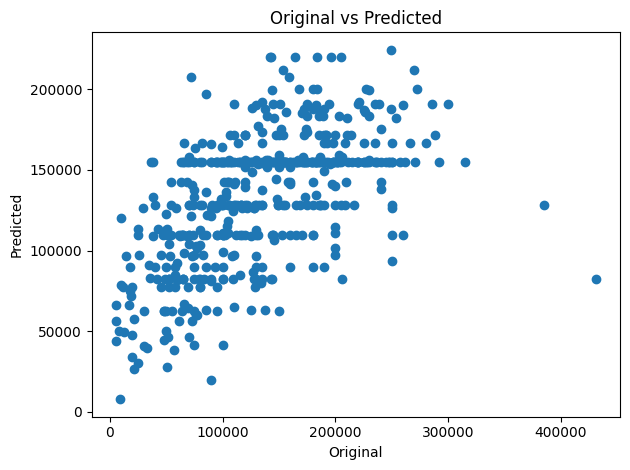

In [328]:
plt.scatter(y_test, y_pred)
plt.title('Original vs Predicted')
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.tight_layout()
plt.show()

In [323]:
x.sample(5)

,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Developer,job_title_AI Programmer,job_title_AI Scientist,job_title_Analytics Engineer,...,job_title_Principal Machine Learning Engineer,job_title_Product Data Analyst,job_title_Product Data Scientist,job_title_Research Engineer,job_title_Research Scientist,job_title_Software Data Engineer,job_title_Staff Data Analyst,job_title_Staff Data Scientist,company_size_M,company_size_S
483,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3184,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
214,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1674,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
360,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [326]:
y.iloc[1674]

171000